In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

2024-06-05 15:27:15.516692: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 15:27:16.267778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# loading the dataset
max_features = 20000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(max_features=max_features)

# loading the word dictionary
w_index = keras.datasets.imdb.get_word_index()
invert_w_index = dict((i,word) for (word,i) in w_index.items())

# decoding the first review as a sample
decoded_sequence = ' '.join(invert_w_index.get(i-3, '#') for i in x_train[0])
print(decoded_sequence)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

In [3]:
# preprocessing the data
maxlen = 200
 
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
vec_len = 32

# defining the LSTM-based model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, vec_len, input_length=maxlen))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(50))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

/home/grey/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-06-05 15:27:20.507909: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-05 15:27:20.512774: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.6971 - loss: 0.5365 - val_accuracy: 0.8595 - val_loss: 0.3299
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.8976 - loss: 0.2619 - val_accuracy: 0.8751 - val_loss: 0.3085
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.9350 - loss: 0.1754 - val_accuracy: 0.8684 - val_loss: 0.3454
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.9551 - loss: 0.1292 - val_accuracy: 0.8698 - val_loss: 0.3236
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.9641 - loss: 0.1048 - val_accuracy: 0.8628 - val_loss: 0.3621


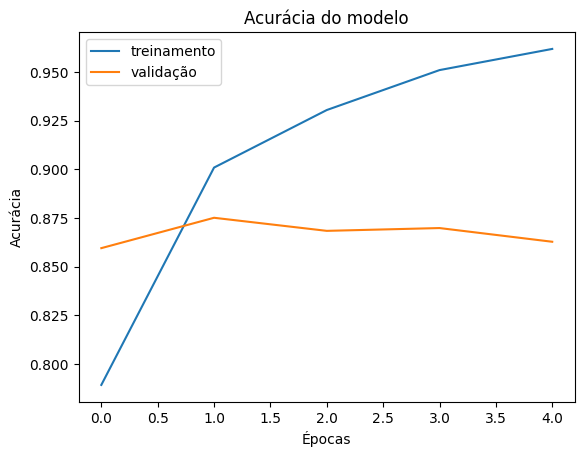

In [6]:
# training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()